In [1]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Pull up all the databases.

In [3]:
df1 = pd.read_csv('data/ml-latest-small/links.csv')
df1.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [4]:
df2 = pd.read_csv('data/ml-latest-small/movies.csv')
df2.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
df3 = pd.read_csv('data/ml-latest-small/ratings.csv')
df3.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
df4 = pd.read_csv('data/ml-latest-small/tags.csv')
df4.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


Drop 'timestamp' columns from df3 and df4.

In [7]:
df3 = df3.drop(columns=['timestamp'], axis=1)
df3.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [8]:
df4 = df4.drop(['timestamp'], axis=1)
df4.head()

,userId,movieId,tag
0,2,60756,funny
1,2,60756,Highly quotable
2,2,60756,will ferrell
3,2,89774,Boxing story
4,2,89774,MMA


In [9]:
df = df1.merge(df2, on='movieId')
df.head()

,movieId,imdbId,tmdbId,title,genres
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,113497,8844.0,Jumanji (1995),Adventure|Children|Fantasy
2,3,113228,15602.0,Grumpier Old Men (1995),Comedy|Romance
3,4,114885,31357.0,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,113041,11862.0,Father of the Bride Part II (1995),Comedy


In [10]:
df = df.merge(df3, on='movieId')
df.head()

,movieId,imdbId,tmdbId,title,genres,userId,rating
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5
3,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5
4,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5


In [11]:
df = df.merge(df4, on='movieId')
df.head()

,movieId,imdbId,tmdbId,title,genres,userId_x,rating,userId_y,tag
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,336,pixar
1,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,474,pixar
2,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,567,fun
3,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,336,pixar
4,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,474,pixar


In [12]:
df = df[['movieId', 'userId_x', 'title', 'genres', 'rating', 'tag']]
df.head()

,movieId,userId_x,title,genres,rating,tag
0,1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,pixar
1,1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,pixar
2,1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,fun
3,1,5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,pixar
4,1,5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,pixar


In [13]:
df = df.rename(columns={'userId_x': 'userId'})
df.head()

,movieId,userId,title,genres,rating,tag
0,1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,pixar
1,1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,pixar
2,1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,fun
3,1,5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,pixar
4,1,5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,pixar


In [14]:
df['new_genres'] = df['genres'].str.split('|',10)
df

,movieId,userId,title,genres,rating,tag,new_genres
0,1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,pixar,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,pixar,"[Adventure, Animation, Children, Comedy, Fantasy]"
2,1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,fun,"[Adventure, Animation, Children, Comedy, Fantasy]"
3,1,5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,pixar,"[Adventure, Animation, Children, Comedy, Fantasy]"
4,1,5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,pixar,"[Adventure, Animation, Children, Comedy, Fantasy]"
...,...,...,...,...,...,...,...
233208,187595,586,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,5.0,star wars,"[Action, Adventure, Children, Sci-Fi]"
233209,193565,184,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,3.5,anime,"[Action, Animation, Comedy, Sci-Fi]"
233210,193565,184,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,3.5,comedy,"[Action, Animation, Comedy, Sci-Fi]"
233211,193565,184,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,3.5,gintama,"[Action, Animation, Comedy, Sci-Fi]"


In [15]:
df = df.explode('new_genres')
df = df.drop(columns=['genres'], axis=1)
df

,movieId,userId,title,rating,tag,new_genres
0,1,1,Toy Story (1995),4.0,pixar,Adventure
0,1,1,Toy Story (1995),4.0,pixar,Animation
0,1,1,Toy Story (1995),4.0,pixar,Children
0,1,1,Toy Story (1995),4.0,pixar,Comedy
0,1,1,Toy Story (1995),4.0,pixar,Fantasy
...,...,...,...,...,...,...
233211,193565,184,Gintama: The Movie (2010),3.5,gintama,Sci-Fi
233212,193565,184,Gintama: The Movie (2010),3.5,remaster,Action
233212,193565,184,Gintama: The Movie (2010),3.5,remaster,Animation
233212,193565,184,Gintama: The Movie (2010),3.5,remaster,Comedy


In [16]:
df.isna().sum()

movieId       0
userId        0
title         0
rating        0
tag           0
new_genres    0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 765271 entries, 0 to 233212
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   movieId     765271 non-null  int64  
 1   userId      765271 non-null  int64  
 2   title       765271 non-null  object 
 3   rating      765271 non-null  float64
 4   tag         765271 non-null  object 
 5   new_genres  765271 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 40.9+ MB


In [18]:
df.set_index('movieId', inplace=True)
df

,userId,title,rating,tag,new_genres
movieId,,,,,
1,1,Toy Story (1995),4.0,pixar,Adventure
1,1,Toy Story (1995),4.0,pixar,Animation
1,1,Toy Story (1995),4.0,pixar,Children
1,1,Toy Story (1995),4.0,pixar,Comedy
1,1,Toy Story (1995),4.0,pixar,Fantasy
...,...,...,...,...,...
193565,184,Gintama: The Movie (2010),3.5,gintama,Sci-Fi
193565,184,Gintama: The Movie (2010),3.5,remaster,Action
193565,184,Gintama: The Movie (2010),3.5,remaster,Animation


In [19]:
df['tag'].value_counts()

thought-provoking              9736
Disney                         8432
sci-fi                         8154
twist ending                   7423
atmospheric                    7173
                               ... 
singers                           1
big wave                          1
Charlotte Bronte                  1
mediacentralism                   1
political right versus left       1
Name: tag, Length: 1584, dtype: int64

In [20]:
df2_tag = df.groupby('tag')['new_genres'].count()
df2_tag

tag
"artsy"                                       12
06 Oscar Nominated Best Movie - Animation    500
1900s                                         10
1920s                                         80
1950s                                         54
                                            ... 
wry                                           24
younger men                                   24
zither                                        72
zoe kazan                                      9
zombies                                      673
Name: new_genres, Length: 1584, dtype: int64

In [21]:
df2_tag_sorted = df2_tag.sort_values(ascending=False)
df2_tag_sorted[:50]

tag
thought-provoking     9736
Disney                8432
sci-fi                8154
twist ending          7423
atmospheric           7173
dark comedy           6969
superhero             6255
psychology            6048
suspense              5897
classic               5306
time travel           5287
action                5176
great soundtrack      5162
imdb top 250          5077
surreal               5068
mindfuck              5014
psychological         4879
quirky                4824
dreamlike             4698
space                 4579
philosophy            4537
stylized              4530
disturbing            4306
visually appealing    4113
violence              4086
crime                 3982
cult film             3860
hit men               3837
Quentin Tarantino     3737
aliens                3676
dark                  3432
drugs                 3350
funny                 3193
emotional             3099
bittersweet           2882
philosophical         2877
Leonardo DiCaprio     28

In [22]:
df2_tag_sorted[51:100]

tag
mental illness         2426
intelligent            2393
ensemble cast          2361
space opera            2340
heartwarming           2328
touching               2308
classic sci-fi         2259
music                  2255
intellectual           2229
revenge                2174
Steve Buscemi          2164
Vietnam                2152
pixar                  2150
violent                2138
Samuel L. Jackson      2084
thriller               2068
social commentary      2031
unique                 2005
gritty                 2003
cerebral               1970
organized crime        1949
nonlinear              1939
martial arts           1927
animation              1914
inspirational          1895
complicated            1873
original plot          1861
Brad Pitt              1846
future                 1813
In Netflix queue       1807
Magic                  1805
hallucinatory          1799
hitman                 1781
Pixar                  1758
based on a book        1755
witty           

In [23]:
df2_tag_sorted[101:150]

tag
humorous                    1549
religion                    1537
alternate reality           1532
brutality                   1524
Star Wars                   1506
space action                1506
EPIC                        1506
gangsters                   1493
sarcasm                     1493
Highly quotable             1468
dark humor                  1454
great dialogue              1440
stylish                     1433
notable soundtrack          1423
Post apocalyptic            1413
Stephen King                1412
dialogue                    1411
guns                        1411
archaeology                 1404
anime                       1403
dance                       1398
adventure                   1381
bloody                      1372
very funny                  1351
luke skywalker              1341
darth vader                 1341
artificial intelligence     1332
intense                     1327
shrimp                      1316
bubba gump shrimp           1316
stupid

In [24]:
df_tag = df.groupby('rating')['tag'].count()
df_tag

rating
0.5      6055
1.0     12095
1.5      4895
2.0     25563
2.5     20020
3.0     90281
3.5     71714
4.0    209766
4.5    106085
5.0    218797
Name: tag, dtype: int64

In [25]:
df_tag_sorted = df_tag.sort_values(ascending=False)
df_tag_sorted

rating
5.0    218797
4.0    209766
4.5    106085
3.0     90281
3.5     71714
2.0     25563
2.5     20020
1.0     12095
0.5      6055
1.5      4895
Name: tag, dtype: int64

In [26]:
df_genres = df.groupby('new_genres')['tag'].count()
df_genres

new_genres
(no genres listed)         3
Action                 69549
Adventure              47939
Animation              10466
Children               11595
Comedy                 96901
Crime                 103102
Documentary              711
Drama                 148389
Fantasy                16220
Film-Noir                783
Horror                 10199
IMAX                   12263
Musical                 4496
Mystery                24352
Romance                25344
Sci-Fi                 51977
Thriller              116891
War                    11737
Western                 2354
Name: tag, dtype: int64

In [27]:
df_genres_sorted = df_genres.sort_values(ascending=False)
df_genres_sorted

new_genres
Drama                 148389
Thriller              116891
Crime                 103102
Comedy                 96901
Action                 69549
Sci-Fi                 51977
Adventure              47939
Romance                25344
Mystery                24352
Fantasy                16220
IMAX                   12263
War                    11737
Children               11595
Animation              10466
Horror                 10199
Musical                 4496
Western                 2354
Film-Noir                783
Documentary              711
(no genres listed)         3
Name: tag, dtype: int64

In [28]:
df_count = df.groupby('new_genres')['rating'].count()
df_count 

new_genres
(no genres listed)         3
Action                 69549
Adventure              47939
Animation              10466
Children               11595
Comedy                 96901
Crime                 103102
Documentary              711
Drama                 148389
Fantasy                16220
Film-Noir                783
Horror                 10199
IMAX                   12263
Musical                 4496
Mystery                24352
Romance                25344
Sci-Fi                 51977
Thriller              116891
War                    11737
Western                 2354
Name: rating, dtype: int64

In [29]:
df_count_sorted = df_count.sort_values(ascending=False)
df_count_sorted

new_genres
Drama                 148389
Thriller              116891
Crime                 103102
Comedy                 96901
Action                 69549
Sci-Fi                 51977
Adventure              47939
Romance                25344
Mystery                24352
Fantasy                16220
IMAX                   12263
War                    11737
Children               11595
Animation              10466
Horror                 10199
Musical                 4496
Western                 2354
Film-Noir                783
Documentary              711
(no genres listed)         3
Name: rating, dtype: int64

In [30]:
df_count_sorted.index[:9]

Index(['Drama', 'Thriller', 'Crime', 'Comedy', 'Action', 'Sci-Fi', 'Adventure',
       'Romance', 'Mystery'],
      dtype='object', name='new_genres')

In [31]:
df_count_sorted.values[:9]

array([148389, 116891, 103102,  96901,  69549,  51977,  47939,  25344,
        24352], dtype=int64)

<ipython-input-32-6f85de63441a>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x.str.replace(',', '\n'))


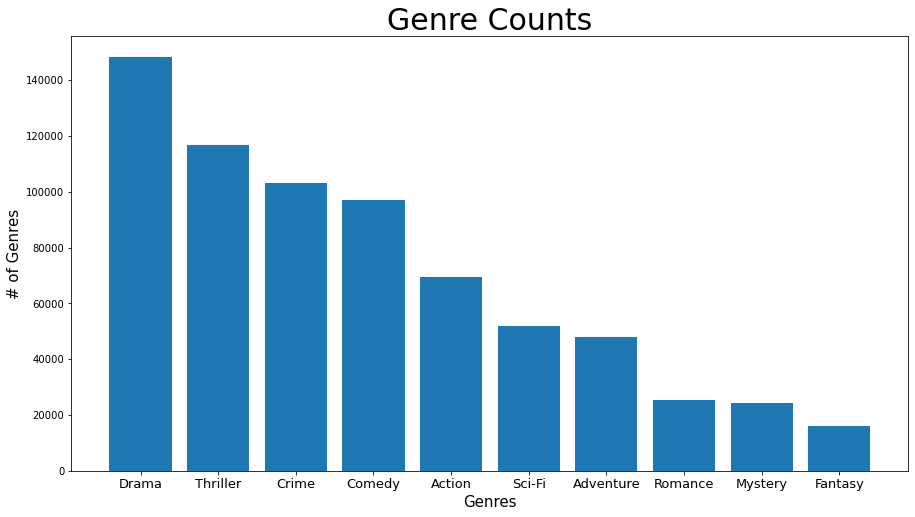

In [32]:
x = df_count_sorted.index[:10]
y = df_count_sorted.values[:10]

fig, ax = plt.subplots(figsize=(15,8))

ax.bar(x,y)

ax.set_title('Genre Counts', fontsize=30)
ax.set_xlabel('Genres', fontsize=15)
ax.set_ylabel('# of Genres', fontsize=15)

ax.set_xticklabels(x.str.replace(',', '\n'))
ax.tick_params(axis='x', labelsize=13)